In [1]:
!pip install gym-super-mario-bros==7.3.0

     |████████████████████████████████| 198 kB 4.5 MB/s            
     |████████████████████████████████| 76 kB 3.7 MB/s             
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 1.1 MB 56.4 MB/s            
  Created wheel for nes-py: filename=nes_py-8.1.8-cp37-cp37m-linux_x86_64.whl size=494115 sha256=7ca5e7519e8131d37530d9ec678750359c7028908e97110805f034447d3e3bb0
  Stored in directory: /root/.cache/pip/wheels/f2/05/1f/608f15ab43187096eb5f3087506419c2d9772e97000f3ba025
Successfully built nes-py


In [2]:
import torch
from torch import nn
from torchvision import transforms as T
from PIL import Image
import numpy as np
from pathlib import Path
from collections import deque
import random, datetime, os, copy

# Gym is an OpenAI toolkit for RL
import gym
from gym.spaces import Box
from gym.wrappers import FrameStack

# NES Emulator for OpenAI Gym
from nes_py.wrappers import JoypadSpace

# Super Mario environment for OpenAI Gym
import gym_super_mario_bros

import matplotlib.pyplot as plt

In [3]:
env = gym_super_mario_bros.make("SuperMarioBros-1-1-v0")

In [4]:
env = JoypadSpace(env, [['right'],['right','A']])

In [5]:
env.reset()

array([[[104, 136, 252],
        [104, 136, 252],
        [104, 136, 252],
        ...,
        [104, 136, 252],
        [104, 136, 252],
        [104, 136, 252]],

       [[104, 136, 252],
        [104, 136, 252],
        [104, 136, 252],
        ...,
        [104, 136, 252],
        [104, 136, 252],
        [104, 136, 252]],

       [[104, 136, 252],
        [104, 136, 252],
        [104, 136, 252],
        ...,
        [104, 136, 252],
        [104, 136, 252],
        [104, 136, 252]],

       ...,

       [[240, 208, 176],
        [228,  92,  16],
        [228,  92,  16],
        ...,
        [228,  92,  16],
        [228,  92,  16],
        [  0,   0,   0]],

       [[240, 208, 176],
        [228,  92,  16],
        [228,  92,  16],
        ...,
        [228,  92,  16],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[228,  92,  16],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [228,  92,  16]]

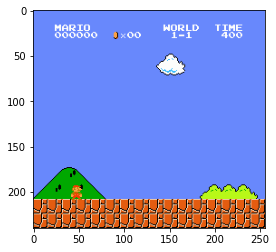

In [6]:
plt.imshow(env.reset())

In [7]:
ns, rew, done, info = env.step(action=0)

In [8]:
ns, rew, done, info

(array([[[104, 136, 252],
         [104, 136, 252],
         [104, 136, 252],
         ...,
         [104, 136, 252],
         [104, 136, 252],
         [104, 136, 252]],
 
        [[104, 136, 252],
         [104, 136, 252],
         [104, 136, 252],
         ...,
         [104, 136, 252],
         [104, 136, 252],
         [104, 136, 252]],
 
        [[104, 136, 252],
         [104, 136, 252],
         [104, 136, 252],
         ...,
         [104, 136, 252],
         [104, 136, 252],
         [104, 136, 252]],
 
        ...,
 
        [[240, 208, 176],
         [228,  92,  16],
         [228,  92,  16],
         ...,
         [228,  92,  16],
         [228,  92,  16],
         [  0,   0,   0]],
 
        [[240, 208, 176],
         [228,  92,  16],
         [228,  92,  16],
         ...,
         [228,  92,  16],
         [  0,   0,   0],
         [  0,   0,   0]],
 
        [[228,  92,  16],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
  

In [9]:
gs = T.Grayscale()
# gs(ns)

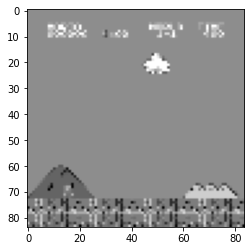

In [10]:
class SkipFrame(gym.Wrapper):
    def __init__(self, env, skip):
        super().__init__(env)
        self._skip = skip
    def step(self, action):
        rew_sum = 0.
        done = False
        for i in range(self._skip):
            obs, rew, done, info = self.env.step(action)
            rew_sum += rew
            if done: break
        return obs, rew_sum, done, info

class GrayScaleObs(gym.ObservationWrapper):
    def __init__(self, env):
        super().__init__(env)
        self.env = env
        obs_shape = self.observation_space.shape[:2]
        self.observation_space = Box(0, 255, 
                                     obs_shape, 
                                     dtype=np.uint8)
    def observation(self, obs):
        obs = torch.tensor(obs.copy(), dtype=torch.float)
        obs = obs.permute(2,0,1)
        tfm = T.Grayscale()
        return tfm(obs)
    
    
class ResizeObs(gym.ObservationWrapper):
    def __init__(self, env, shape):
        super().__init__(env)
        if isinstance(shape, int):
            shape = (shape, shape)
        self.shape = shape
        obs_shape = self.shape + self.observation_space.shape[2:]
        self.observation_space = Box(0, 255, obs_shape, np.uint8)
    def observation(self, obs):
        tfm = T.Compose([
            T.Resize(self.shape),
            T.Normalize(0,255)
        ])
        
        return tfm(obs).squeeze(0)
z = SkipFrame(env, skip=4)
z = GrayScaleObs(z)
z = ResizeObs(z, 84)
mod_env = FrameStack(z, num_stack=4)
plt.imshow(mod_env.reset()[0], cmap='gray')

In [11]:
class Mario:
    def __init__():
        pass
    def act(self, state):
        '''Given a state, choose eps greedy'''
        pass
    def cache(self, exp):
        '''Add the exp to memory'''
        pass
    def recall(self):
        '''Sample exp from mem'''
        pass
    def learn(self):
        '''Update action val (Q) func with a batch of exps'''
        pass

In [12]:
class MarioNet(nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__()
    def forward(self, *args, **kwargs):
        return 

In [13]:
class Mario:
    def __init__(self, state_dim, action_dim, save_dir):
#         super().__init__(state_dim, action_dim, save_dir)
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.save_dir = save_dir
        self.use_cuda = torch.cuda.is_available()
        self.gamma = 0.9
        
        self.net = MarioNet(self.state_dim, self.action_dim).float()
        
        if self.use_cuda:
            self.net = self.net.to(device='cuda')
        
        self.exploration_rate = 1
        self.exploration_rate_decay = 0.99999975
        self.exploration_rate_min = 0.1
        self.curr_step = 0

        self.save_every = 5e5  # no. of experiences between saving Mario Net

    def act(self, state):
        '''Given a state, choose eps greedy'''
        if np.random.rand() < self.exploration_rate:
            #explore
            action_index = np.random.randint(self.action_dim)
            
        else:
            #exploit
            action_index = np.random.randint(self.action_dim)
            assert torch.is_tensor(state)
            if self.use_cuda:
                state = torch.tensor(state).cuda()
            else:
                state = torch.tensor(state)
            state = state[None, ...]
            action_values = self.net(state, model='online')
            action_idx = torch.argmax(action_values, axis=1).item()
        
        self.exploration_rate *= self.exploration_rate_decay
        self.exploration_rate = max(self.exploration_rate_min,
                                   self.exploration_rate)
        self.curr_step += 1
        return action_index
    def cache(self, exp):
        '''Add the exp to memory'''
        pass
    def recall(self):
        '''Sample exp from mem'''
        pass
    def learn(self):
        '''Update action val (Q) func with a batch of exps'''
        pass
state_dim = (4, 84, 84)
action_dim = 2
save_dir = '.'
mario = Mario(state_dim, action_dim, save_dir)
mario.act(mod_env.observation_space.sample())

1

In [14]:
class Mario2(Mario):  # subclassing for continuity
    def __init__(self, state_dim, action_dim, save_dir):
        super().__init__(state_dim, action_dim, save_dir)
        self.memory = deque(maxlen=100000)
        self.batch_size = 32

    def cache(self, state, next_state, action, reward, done):
        """
        Store the experience to self.memory (replay buffer)

        Inputs:
        state (LazyFrame),
        next_state (LazyFrame),
        action (int),
        reward (float),
        done(bool))
        """
        state = state.__array__()
        next_state = next_state.__array__()

        if self.use_cuda:
            state = torch.tensor(state).cuda()
            next_state = torch.tensor(next_state).cuda()
            action = torch.tensor([action]).cuda()
            reward = torch.tensor([reward]).cuda()
            done = torch.tensor([done]).cuda()
        else:
            state = torch.tensor(state)
            next_state = torch.tensor(next_state)
            action = torch.tensor([action])
            reward = torch.tensor([reward])
            done = torch.tensor([done])

        self.memory.append((state, next_state, action, reward, done,))

    def recall(self):
        """
        Retrieve a batch of experiences from memory
        """
        batch = random.sample(self.memory, self.batch_size)
        state, next_state, action, reward, done = map(torch.stack, zip(*batch))
        return state, next_state, action.squeeze(), reward.squeeze(), done.squeeze()

state_dim = (4, 84, 84)
action_dim = 2
save_dir = '.'
mario = Mario2(state_dim, action_dim, save_dir)
st = mod_env.observation_space.sample()
act = mario.act(st)
ns,rw,done,info = mod_env.step(act)
for _ in range(33): mario.cache(st,ns,act,rw,done)
rec = mario.recall()

In [15]:
len(rec)

5

In [16]:
class MarioNet(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        c,h,w = input_dim
        self.online = nn.Sequential(
            nn.Conv2d(in_channels=c, out_channels=32, kernel_size=8, stride=4),
            nn.ReLU(),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=4, stride=2),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(3136, 512),
            nn.ReLU(),
            nn.Linear(512, output_dim),
        )
        self.target = copy.deepcopy(self.online)
        # Q target is frozen, only peridoically updated
        for p in self.target.parameters():
            p.requires_grad = False
            
    def forward(self, input, model):
        if model == 'online':
            return self.online(input)
        elif model == 'target':
            return self.target(input)
            

In [17]:
class Mario3(Mario2):
    def __init__(self, state_dim, action_dim, save_dir):
        super().__init__(state_dim, action_dim, save_dir)
        self.gamma = .9
    def td_estimate(self, state, action):
        current_Q = self.net(state, model='online')
        current_Q = current_Q[np.arange(self.batch_size), action]
        return current_Q
    @torch.no_grad()
    def td_target(self, reward, next_state, done):
        next_state_Q = self.net(next_state, model='online')
        best_action = torch.argmax(next_state_Q, axis=1)
        next_Q = self.net(next_state, model='target')
        next_Q = next_Q[np.arange(self.batch_size), best_action]
        return (reward + (1-done.float()) * self.gamma * next_Q).float()

In [18]:
mario.net(torch.randn(1,4,84,84),'online')

In [19]:
state_dim = (4, 84, 84)
action_dim = 2
save_dir = '.'
mario = Mario3(state_dim, action_dim, save_dir)
st = mod_env.observation_space.sample()
act = mario.act(st)
ns,rw,done,info = mod_env.step(act)
for _ in range(33): mario.cache(st,ns,act,rw,done)
rec = mario.recall()
mario.td_estimate(torch.randn(33,4,84,84), 0)

tensor([-0.0454, -0.0294, -0.0374, -0.0423, -0.0255, -0.0516, -0.0347, -0.0264,
        -0.0352, -0.0268, -0.0314, -0.0342, -0.0385, -0.0349, -0.0235, -0.0222,
        -0.0477, -0.0295, -0.0302, -0.0577, -0.0471, -0.0371, -0.0349, -0.0250,
        -0.0377, -0.0329, -0.0397, -0.0385, -0.0320, -0.0314, -0.0395, -0.0358],
       grad_fn=<IndexBackward>)

In [20]:
class Mario4(Mario3):
    
    def __init__(self, state_dim, action_dim, save_dir):
        super().__init__(state_dim, action_dim, save_dir)
        self.optimizer = torch.optim.Adam(self.net.parameters(), lr=0.00025)
        self.loss_fn = torch.nn.SmoothL1Loss()

    def update_Q_online(self, td_estimate, td_target):
        loss = self.loss_fn(td_estimate, td_target)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        return loss.item()

    def sync_Q_target(self):
        self.net.target.load_state_dict(self.net.online.state_dict())
        
    def save(self):
        save_path = (
            self.save_dir / f'mario_net_{int(self.curr_step // self.save_every)}'
        )
        torch.save(
            dict(
                model=self.net.state_dict(),
                exploration_rate=self.exploration_rate
                ),
            save_path,
        )
        print("mario net saved at", save_path, 'at step', self.curr_step)

In [21]:
mario = Mario4(state_dim, action_dim, Path(save_dir))
mario.save()

mario net saved at mario_net_0 at step 0


In [22]:
class Mario5(Mario4):
    def __init__(self, state_dim, action_dim, save_dir):
        super().__init__(state_dim, action_dim, save_dir)
        self.burnin = 1e4 # min exps before train
        self.learn_every = 3 # no. exps between Q_online updates
        self.sync_every = 1e4 # no. exps between Q_target & Q_online sync
    def learn(self,):
        if self.curr_step % self.sync_every == 0:
            self.sync_Q_target()

        if self.curr_step % self.save_every == 0:
            self.save()

        if self.curr_step < self.burnin:
            return None, None

        if self.curr_step % self.learn_every != 0:
            return None, None
        
        s, ns, act, rew, done = self.recall()
        td_est = self.td_estimate(s, act)
        td_tgt = self.td_target(s, act)
        
        loss = self.update_Q_online(td_est, td_tgt)
        
        return (td_est.mean().item(), loss)

In [23]:
import numpy as np
import time, datetime
import matplotlib.pyplot as plt

In [26]:
class MetricLogger:
    def __init__(self, save_dir):
        self.save_log = save_dir / "log"
        with open(self.save_log, "w") as f:
            f.write(
                f"{'Episode':>8}{'Step':>8}{'Epsilon':>10}{'MeanReward':>15}"
                f"{'MeanLength':>15}{'MeanLoss':>15}{'MeanQValue':>15}"
                f"{'TimeDelta':>15}{'Time':>20}\n"
            )
        self.ep_rewards_plot = save_dir / "reward_plot.jpg"
        self.ep_lengths_plot = save_dir / "length_plot.jpg"
        self.ep_avg_losses_plot = save_dir / "loss_plot.jpg"
        self.ep_avg_qs_plot = save_dir / "q_plot.jpg"

        # History metrics
        self.ep_rewards = []
        self.ep_lengths = []
        self.ep_avg_losses = []
        self.ep_avg_qs = []

        # Moving averages, added for every call to record()
        self.moving_avg_ep_rewards = []
        self.moving_avg_ep_lengths = []
        self.moving_avg_ep_avg_losses = []
        self.moving_avg_ep_avg_qs = []

        # Current episode metrics
        self.init_episode()

        # Timing
        self.record_time = time.time()
        
    def log_step(self, reward, loss, q):
        self.curr_ep_reward += reward
        self.curr_ep_length += 1
        if loss:
            self.curr_ep_loss += loss
            self.curr_ep_q += q
            self.curr_ep_loss_length += 1
            
    def init_episode(self):
        self.curr_ep_reward = 0.0
        self.curr_ep_length = 0
        self.curr_ep_loss = 0.0
        self.curr_ep_q = 0.0
        self.curr_ep_loss_length = 0
        
    def log_episode(self):
        "Mark end of ep"
        
        self.ep_rewards.append(self.curr_ep_reward)
        self.ep_lengths.append(self.curr_ep_length)
        
        if self.curr_ep_loss_length == 0:
            ep_avg_loss = 0
            ep_avg_q = 0
        else:
            ep_avg_loss = np.round(self.curr_ep_loss / self.curr_ep_loss_length, 5)
            ep_avg_q = np.round(self.curr_ep_q / self.curr_ep_loss_length, 5)
        
        
        self.ep_avg_losses.append(ep_avg_loss)
        self.ep_avg_qs.append(ep_avg_q)
        
        self.init_episode()
        
    def record(self, episode, epsilon, step):
        mean_ep_reward = np.round(np.mean(self.ep_rewards[-100:]), 3)
        mean_ep_length = np.round(np.mean(self.ep_lengths[-100:]), 3)
        mean_ep_loss = np.round(np.mean(self.ep_avg_losses[-100:]), 3)
        mean_ep_q = np.round(np.mean(self.ep_avg_qs[-100:]), 3)
        self.moving_avg_ep_rewards.append(mean_ep_reward)
        self.moving_avg_ep_lengths.append(mean_ep_length)
        self.moving_avg_ep_avg_losses.append(mean_ep_loss)
        self.moving_avg_ep_avg_qs.append(mean_ep_q)

        last_record_time = self.record_time
        self.record_time = time.time()
        time_since_last_record = np.round(self.record_time - last_record_time, 3)

        print(
            f"Episode {episode} - "
            f"Step {step} - "
            f"Epsilon {epsilon} - "
            f"Mean Reward {mean_ep_reward} - "
            f"Mean Length {mean_ep_length} - "
            f"Mean Loss {mean_ep_loss} - "
            f"Mean Q Value {mean_ep_q} - "
            f"Time Delta {time_since_last_record} - "
            f"Time {datetime.datetime.now().strftime('%Y-%m-%dT%H:%M:%S')}"
        )

        with open(self.save_log, "a") as f:
            f.write(
                f"{episode:8d}{step:8d}{epsilon:10.3f}"
                f"{mean_ep_reward:15.3f}{mean_ep_length:15.3f}{mean_ep_loss:15.3f}{mean_ep_q:15.3f}"
                f"{time_since_last_record:15.3f}"
                f"{datetime.datetime.now().strftime('%Y-%m-%dT%H:%M:%S'):>20}\n"
            )

        for metric in ["ep_rewards", "ep_lengths", "ep_avg_losses", "ep_avg_qs"]:
            plt.plot(getattr(self, f"moving_avg_{metric}"))
            plt.savefig(getattr(self, f"{metric}_plot"))
            plt.clf()

In [40]:
from tqdm.auto import tqdm
use_cuda = torch.cuda.is_available()

print(f'Using cuda: {use_cuda}')
print()


save_dir = Path("checkpoints") / datetime.datetime.now().strftime("%Y-%m-%dT%H-%M-%S")
save_dir.mkdir(parents=True,exist_ok=True)

mario = Mario5(state_dim=(4,84,84), action_dim=env.action_space.n,
              save_dir=save_dir)

logger = MetricLogger(save_dir=save_dir)

episodes = 10
for e in tqdm(range(episodes)):
    state = mod_env.reset()
    while True:
        act = mario.act(state)
        ns, rew, done, info = mod_env.step(act)
        mario.cache(state, ns, act, rew, done)
        q, loss = mario.learn()
        logger.log_step(rew,loss, q)
        state = ns
        if done or info['flag_get']:
            break
    logger.log_episode()
    
    if e % 20 == 0:
        logger.record(e, mario.exploration_rate, mario.curr_step)

Using cuda: False



  0%|          | 0/10 [00:00<?, ?it/s]

Episode 0 - Step 98 - Epsilon 0.9999755002970567 - Mean Reward 626.0 - Mean Length 98.0 - Mean Loss 0.0 - Mean Q Value 0.0 - Time Delta 1.332 - Time 2022-01-22T16:47:20


<Figure size 432x288 with 0 Axes>